<a href="https://colab.research.google.com/github/hojuna/Black-box_Optimization_dacon/blob/main/test_for_cluster.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



# 클러스터링 실험

x_6을 y값의 평균의 차이가 최소가 되도록 두 파트로 분리하였음

Cross-validation MSE: 2.9398 (+/- 1.0186)

Cross-validation_0 MSE: 2.8931 (+/- 1.7835)

Cross-validation MSE: 3.2631 (+/- 0.1781)


=KernelRidge: 0.8778054862842892 val_score 다 똑같이 나와서 함수를 잘 못만든거진지 흠 잘 모르겠음

그래서 Cross-validation로 평가 줬는데 이게 의미가 있는지는 모르겠다.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
train_df_org = pd.read_csv('/content/drive/MyDrive/dacon/2024_8_data/train.csv')
test_df = pd.read_csv('/content/drive/MyDrive/dacon/2024_8_data/test.csv')



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


#x_6 min 0.4637835200953135
#x_6 max 0.5850860627079832
#x_6 mean 0.48833593129836433

print(  train_df_org['x_6'].mean())

df_sorted = train_df_org.sort_values(by='x_6', ascending=True)

part_1=df_sorted['y'][0]
part_2=train_df_org['y'].sum()-part_1

len_df_sorted=len(df_sorted)

result=1000
best_0_y_mean=0
best_1_y_mean=0
best_i=0
for i in range(1, len_df_sorted):
  part_1+=df_sorted['y'][i]
  part_2-=df_sorted['y'][i]
  temp=part_1/i-part_2/(len_df_sorted-i)
  if temp<result:
    best_i=i
    result=temp
    best_0_y_mean=part_1/i
    best_1_y_mean=part_2/(len_df_sorted-i)

print(f"best_result: {result}")
print(f"best_0_y_mean: {best_0_y_mean}")
print(f"best_1_y_mean: {best_1_y_mean}")
print(f"best_i: {best_i}")

0.48833593129836433
best_result: -0.07399123913221217
best_0_y_mean: 83.62862110751404
best_1_y_mean: 83.70261234664625
best_i: 34924


In [ ]:
df_sorted['x_6'][34924]

0.4936684498236188

In [ ]:
df_shuffled= train_df_org
# 균등하게 나누기 위해 임의로 데이터를 8:2로 분할
split_index = int(len(df_shuffled) * 0.8)
train_df, valiation_df = df_shuffled[:split_index], df_shuffled[split_index:]


In [ ]:
mean_result= df_sorted['x_6'][best_i]
train_df['cluster'] = np.where(train_df['x_6'] <= mean_result, 0, 1)

<ipython-input-26-277ceb9bd006>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['cluster'] = np.where(train_df['x_6'] <= mean_result, 0, 1)


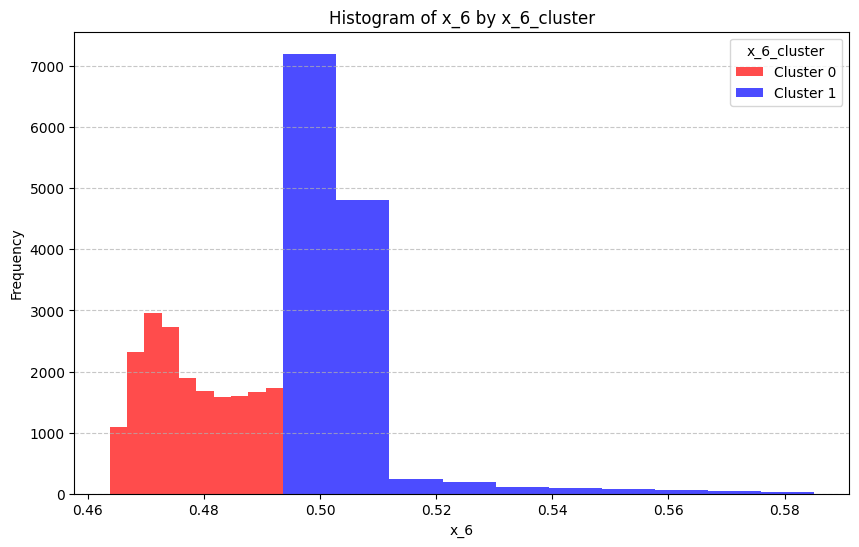

In [ ]:
# 색상 설정
colors = {0: 'red', 1: 'blue'}

# 히스토그램 그리기
plt.figure(figsize=(10, 6))
for cluster in train_df['cluster'].unique():
    subset = train_df[train_df['cluster'] == cluster]
    plt.hist(subset['x_6'], bins=10, alpha=0.7, color=colors[cluster], label=f'Cluster {cluster}')

plt.xlabel('x_6')
plt.ylabel('Frequency')
plt.title('Histogram of x_6 by x_6_cluster')
plt.legend(title='x_6_cluster')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [ ]:
train_df_cluster_0 = train_df[train_df['cluster'] == 0].drop(columns=['cluster'])
train_df_cluster_1 = train_df[train_df['cluster'] == 1].drop(columns=['cluster'])

In [ ]:

def val_score(model_k, valiation_df):
  id_y=pd.DataFrame()

  top_5_percent_valiation_df = valiation_df.sort_values(by='y').reset_index(drop=True)[-int(0.05 * len(valiation_df)):]
  #id만 분리 valiation_df, y값 제거
  X = valiation_df.iloc[:, 1:-1]
  id_y['ID']=valiation_df.iloc[:,0]

  #valiation_df y값 예측
  y_pred=model_k.predict(X)
  id_y['y_pred']=y_pred

  # print(id_x.head)
  # #id 복원

  #상위 10% valiation_df 구하기
  top_10_percent_pred_valiation=id_y.sort_values(by='y_pred').reset_index(drop=True)[-int(0.10 * len(id_y)):]

  # ID 값에서 공백 제거
  top_5_percent_valiation_df['ID'] = top_5_percent_valiation_df['ID'].str.strip()
  top_10_percent_pred_valiation['ID'] = top_10_percent_pred_valiation['ID'].str.strip()

  #top_5_percent_valiation_df 중  상위 10%에 포함되는 비율을 구해서 반환
  return top_5_percent_valiation_df['ID'].isin(top_10_percent_pred_valiation['ID']).sum()/len(top_5_percent_valiation_df)

In [ ]:
X = train_df.iloc[:, 1:-2]  # Features
y = train_df['y']  # Target


X_0 = train_df_cluster_0.iloc[:, 1:-1]  # Features
y_0 = train_df_cluster_0['y']  # Target


X_1 = train_df_cluster_1.iloc[:, 1:-1]  # Features
y_1 = train_df_cluster_1['y']  # Target

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32094 entries, 0 to 32093
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x_0     32094 non-null  float64
 1   x_1     32094 non-null  float64
 2   x_2     32094 non-null  float64
 3   x_3     32094 non-null  float64
 4   x_4     32094 non-null  float64
 5   x_5     32094 non-null  float64
 6   x_6     32094 non-null  float64
 7   x_7     32094 non-null  float64
 8   x_8     32094 non-null  float64
 9   x_9     32094 non-null  float64
 10  x_10    32094 non-null  float64
dtypes: float64(11)
memory usage: 2.7 MB


In [ ]:
from sklearn.kernel_ridge import KernelRidge


model = KernelRidge(kernel='rbf')
model.fit(X,y)
score=val_score(model,valiation_df)
print("KernelRidge:" , score)


model_0 = KernelRidge(kernel='rbf')
model_0.fit(X_0,y_0)
score=val_score(model_0,valiation_df)
print("model_0_KernelRidge:" , score)

model_1 = KernelRidge(kernel='rbf')
model_1.fit(X_1,y_1)
score=val_score(model_1,valiation_df)
print("model_1_KernelRidge:" , score)

KernelRidge: 0.8778054862842892
model_0_KernelRidge: 0.8778054862842892
model_1_KernelRidge: 0.8778054862842892


In [ ]:
score=val_score(model,valiation_df)
print("KernelRidge:" , score)

score=val_score(model_0,valiation_df)
print("model_0_KernelRidge:" , score)

score=val_score(model_1,valiation_df)
print("model_1_KernelRidge:" , score)

KernelRidge: 0.8778054862842892
model_0_KernelRidge: 0.8778054862842892
model_1_KernelRidge: 0.8778054862842892


In [ ]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')
print(f"Cross-validation MSE: {-cv_scores.mean():.4f} (+/- {cv_scores.std() * 2:.4f})")
cv_scores_0 = cross_val_score(model_0, X_0, y_0, cv=5, scoring='neg_mean_squared_error')
print(f"Cross-validation_0 MSE: {-cv_scores_0.mean():.4f} (+/- {cv_scores_0.std() * 2:.4f})")
cv_scores_1 = cross_val_score(model_1, X_1, y_1, cv=5, scoring='neg_mean_squared_error')
print(f"Cross-validation MSE: {-cv_scores_1.mean():.4f} (+/- {cv_scores_1.std() * 2:.4f})")

Cross-validation MSE: 2.9398 (+/- 1.0186)
Cross-validation_0 MSE: 2.8931 (+/- 1.7835)
Cross-validation MSE: 3.2631 (+/- 0.1781)
